<h1> Exploring Sephora: Data Analysis and Visualization with Python </h1>


<h2> The Project Goal</h2>

<p> The project aims to extract valuable insights from the Sephora dataset, exploring customer preferences, product prices and correlations between various features.</p>

<h2> About Dataset </h2>

<p>This dataset was collected via a Python scraper in March 2023 and contains information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings and other features. </p>

<h2> Content </h2>

| Feature           | Description                                                                                              |
| ------------------| ---------------------------------------------------------------------------------------------------------|
| product_id        | The unique identifier for the product from the site                                                      |
| product_name      | The full name of the product                                                                             |
| brand_id          | The unique identifier for the product brand from the site                                                |
| brand_name	    | The full name of the product brand                                                                       |
| loves_count       | The number of people who have marked this product as a favorite                                          |
| rating            | The average rating of the product based on user reviews                                                  |
| reviews           | The number of user reviews for the product                                                               |
| size              | The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type  |
| variation_type    | The type of variation parameter for the product (e.g. Size, Color)                                       |
| variation_value   | The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)                 |
| variation_desc    | A description of the variation parameter for the product (e.g. tone for fairest skin)                    |
| ingredients       | A list of ingredients included in the product.                                                           |
| price_usd         | The price of the product in US dollars                                                                   |
| value_price_usd   | The potential cost savings of the product, presented on the site next to the regular price               |
| sale_price_usd    | The sale price of the product in US dollars                                                              |
| limited_edition   | Indicates whether the product is a limited edition or not (1-true, 0-false)                              |
| new               | Indicates whether the product is new or not (1-true, 0-false)                                            |
| online_only       | Indicates whether the product is only sold online or not (1-true, 0-false)                               |
| out_of_stock      | Indicates whether the product is currently out of stock or not (1 if true, 0 if false)                   |
| sephora_exclusive | Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)                     |
| highlights        | A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’])      |
| primary_category  | First category in the breadcrumb section                                                                 |
| secondary_category|Second category in the breadcrumb section                                                                 |
| tertiary_category | Third category in the breadcrumb section                                                                 |
| child_count       | The number of variations of the product available                                                        |
| child_max_price   | The highest price among the variations of the product                                                    |
| child_min_price   | The lowest price among the variations of the product                                                     |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
sns.set_palette("plasma")
sns.set_style("darkgrid")

In [3]:
path = r"C:\Users\ssedy\Python_Projects\Sephora\product_info.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
print("Number of rows: " + str(df.shape[0]))

Number of rows: 8494


In [7]:
print("Number of columns: " + str(df.shape[1]))

Number of columns: 27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

<h2> Data Preparation</h2> 

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

<p>Dropping columns with a high percentage of missing values and those that will not be used in the analysis.</p>

In [11]:
df.drop(columns = ["variation_desc", "value_price_usd", "sale_price_usd", "variation_value","variation_type","child_max_price", "child_min_price", "tertiary_category", "size", "child_count"], axis = 1, inplace = True)

<p>Replacing missing values.</p>

In [12]:
df["reviews"].fillna(0, inplace=True)
df["rating"].fillna(0, inplace=True)
df["ingredients"].fillna("unknown", inplace=True)
df["highlights"].fillna("unknown", inplace=True)
df["secondary_category"].fillna("unknown", inplace = True)

In [13]:
df.isnull().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
ingredients           0
price_usd             0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
dtype: int64

In [14]:
df["brand_name"] = df["brand_name"].str.upper()

In [15]:
df.rename(columns = {"loves_count": "likes_count"}, inplace = True)

<h2> Summary Statistics </h2>

In [16]:
df.describe().apply(lambda s: s.apply("{0:.2f}".format))

,brand_id,likes_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive
count,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00
mean,5422.44,29179.57,4.06,433.87,51.66,0.07,0.07,0.22,0.07,0.28
std,1709.60,66092.12,0.90,1086.73,53.67,0.26,0.26,0.41,0.26,0.45
min,1063.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00
25%,5333.00,3758.00,3.93,22.00,25.00,0.00,0.00,0.00,0.00,0.00
50%,6157.50,9880.00,4.27,112.00,35.00,0.00,0.00,0.00,0.00,0.00
75%,6328.00,26841.25,4.52,402.00,58.00,0.00,0.00,0.00,0.00,1.00
max,8020.00,1401068.00,5.00,21281.00,1900.00,1.00,1.00,1.00,1.00,1.00


In [17]:
df.describe(include = ["object"])

,product_id,product_name,brand_name,ingredients,highlights,primary_category,secondary_category
count,8494,8494,8494,8494,8494,8494,8494
unique,8494,8415,304,6539,4418,9,42
top,P473671,Fragrance Discovery Set,SEPHORA COLLECTION,unknown,unknown,Skincare,Women
freq,1,3,352,945,2207,2420,875


<p>Top product and brand: </p>

In [18]:
df.describe(include=["object"]).loc["top", ["product_name", "brand_name"]].to_frame()

,top
product_name,Fragrance Discovery Set
brand_name,SEPHORA COLLECTION


<h2>  Univariate Analysis</h2>

<h3> Numerical Variables: </h3>

<h3> Likes Count </h3>

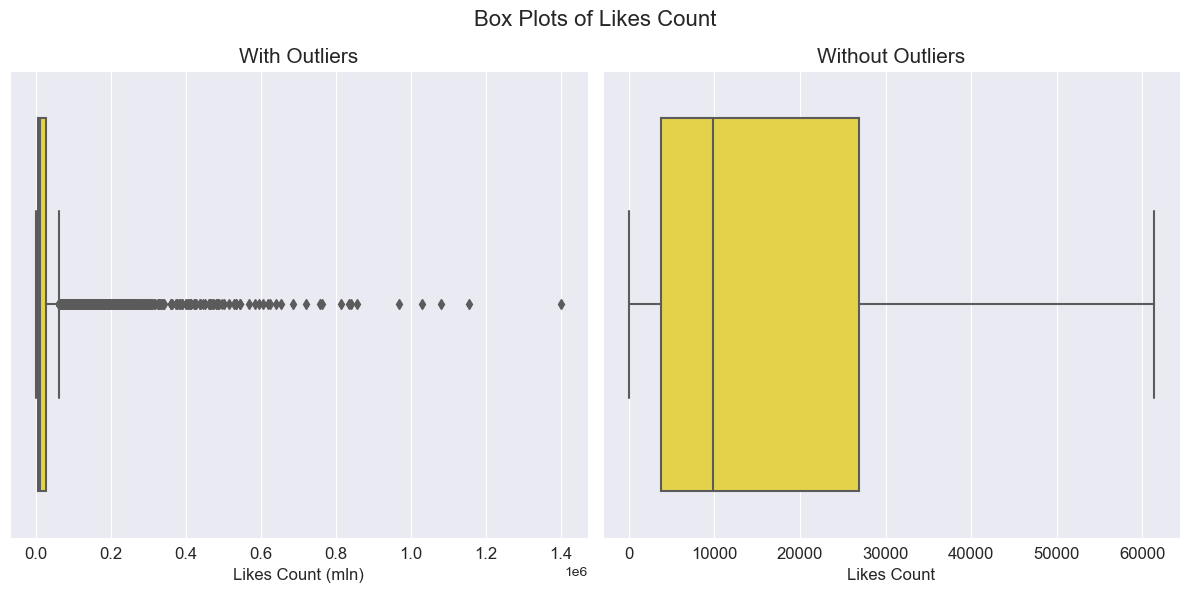

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df["likes_count"], ax=axes[0], color = "#FEE631")
axes[0].set_title("With Outliers", fontsize = 15)
axes[0].set_xlabel("Likes Count (mln)", fontsize = 12)
axes[0].tick_params(labelsize=12)

sns.boxplot(x=df["likes_count"], ax=axes[1], showfliers = False, color = "#FEE631")
axes[1].set_title("Without Outliers", fontsize = 15)
axes[1].set_xlabel("Likes Count", fontsize = 12)
axes[1].tick_params(labelsize=12)

plt.suptitle("Box Plots of Likes Count", fontsize = 16)
plt.tight_layout()
plt.show()

<p> Likes Count Statistics: <p>

In [20]:
likes_count_stat = {
    "mean": "mean",
    "median": "median",
    "max": "max",
}
likes_count_result = round(df["likes_count"].agg(likes_count_stat), 2)
likes_count_result.to_frame()

,likes_count
mean,29179.57
median,9880.00
max,1401068.00


In [21]:
print("The product with the highest Likes Count: " + df.at[df["likes_count"].idxmax(), "product_name"])

The product with the highest Likes Count: Soft Pinch Liquid Blush


<h3> Rating </h3>

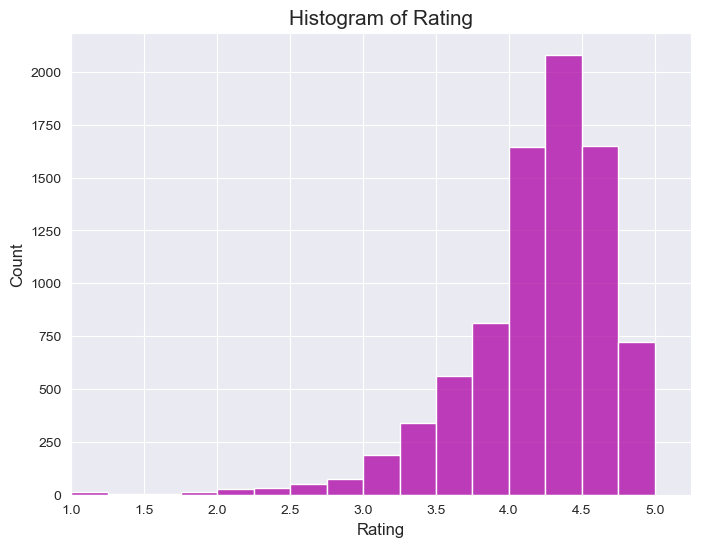

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df["rating"], bins=20, color = "#AD01A5")
plt.title("Histogram of Rating", fontsize=15)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlim(1,)
plt.show()

<p>Rating Statistics: <p>

In [23]:
rating_stat = {
    "mean": "mean",
    "median": "median"    
}
rating_result = round(df["rating"].agg(rating_stat),2)
rating_result.to_frame()

,rating
mean,4.06
median,4.27


<h3> Reviews </h3>

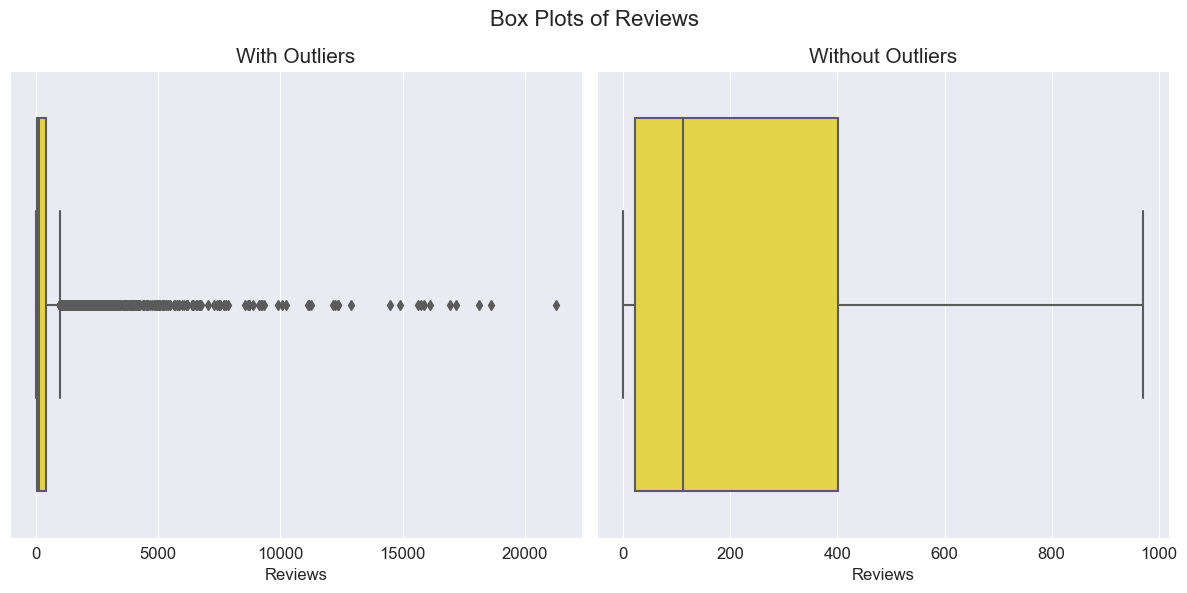

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=df["reviews"], ax=axes[0], color = "#FEE631")
axes[0].set_title("With Outliers", fontsize = 15)
axes[0].set_xlabel("Reviews", fontsize = 12)
axes[0].tick_params(labelsize=12)

sns.boxplot(x=df["reviews"], ax=axes[1], showfliers = False, color = "#FEE631")
axes[1].set_title("Without Outliers", fontsize = 15)
axes[1].set_xlabel("Reviews", fontsize = 12)
axes[1].tick_params(labelsize=12)

plt.suptitle("Box Plots of Reviews", fontsize = 16)
plt.tight_layout()
plt.show()

<p>Reviews Statistics: <P>

In [25]:
reviews_stat = {
    "mean": "mean",
    "median": "median",
    "max": "max",
}
reviews_result = round(df["reviews"].agg(reviews_stat),2)
reviews_result.to_frame()

,reviews
mean,433.87
median,112.00
max,21281.00


In [26]:
print("The product with the max reviews: " + df.at[df["reviews"].idxmax(), "product_name"])

The product with the max reviews: Tattoo Liner Vegan Waterproof Liquid Eyeliner


<h3> Price (USD) </h3>

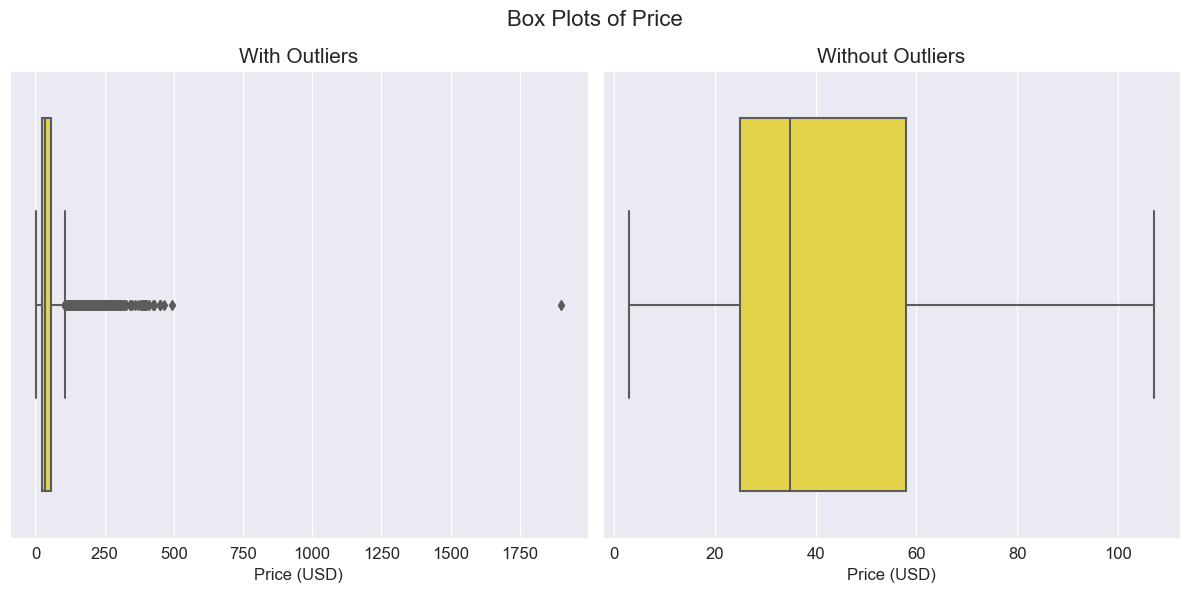

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=df["price_usd"], ax=axes[0], color = "#FEE631")
axes[0].set_title("With Outliers", fontsize = 15)
axes[0].set_xlabel("Price (USD)", fontsize = 12)
axes[0].tick_params(axis='both', which='major', labelsize=12) 

sns.boxplot(x=df["price_usd"], ax=axes[1], showfliers = False, color = "#FEE631")
axes[1].set_title("Without Outliers", fontsize = 15)
axes[1].set_xlabel("Price (USD)", fontsize = 12)
axes[1].tick_params(axis='both', which='major', labelsize=12) 

plt.suptitle("Box Plots of Price", fontsize = 16)
plt.tight_layout()
plt.show()

<p> Price (USD) Statistics: </p>

In [28]:
price_usd_stat = {
    "mean": "mean",
    "median": "median",
    "max": "max",
    "min": "min"
}
price_result = round(df["price_usd"].agg(price_usd_stat),2)
price_result.to_frame()

,price_usd
mean,51.66
median,35.00
max,1900.00
min,3.00


In [29]:
print("The most expensive product: " +  df.at[df["price_usd"].idxmax(), "product_name"])

The most expensive product: Shani Darden by Déesse PRO LED Light Mask


<h3> Boolean Variables: </h3>

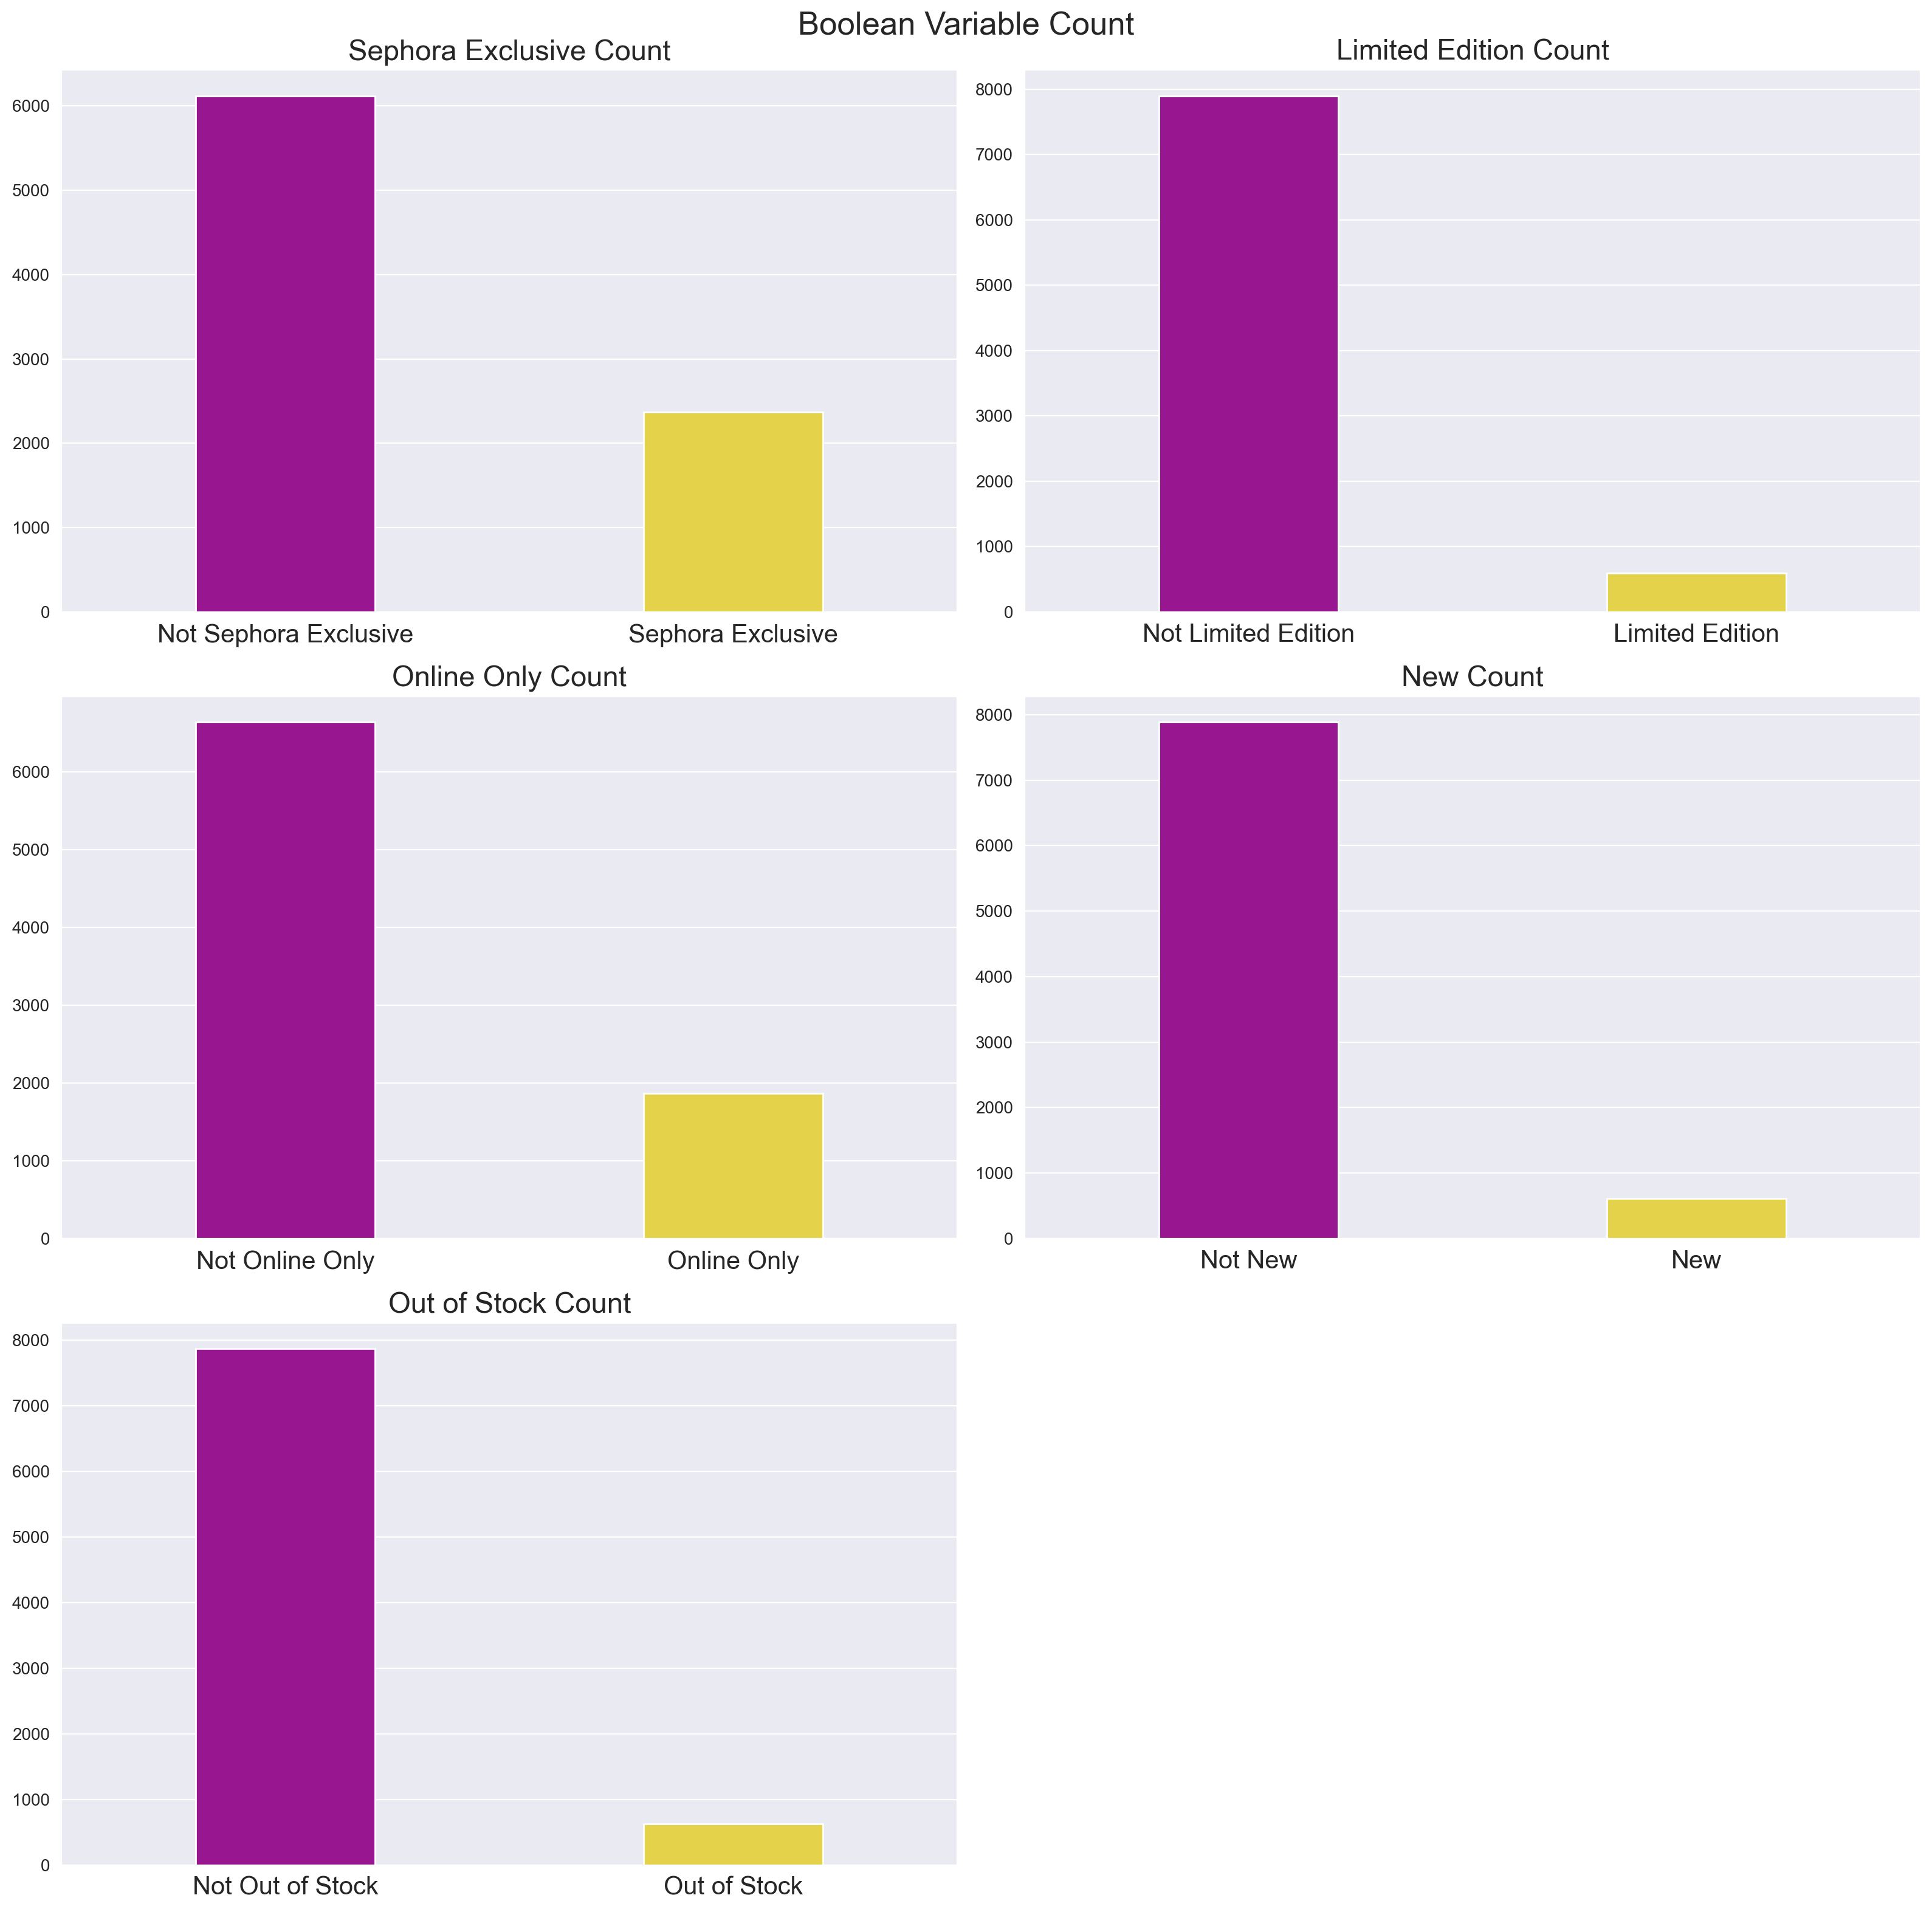

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16), dpi = 200)

custom_palette = ["#AD01A5", "#FEE631"]

sns.countplot(data=df, x="sephora_exclusive", width=0.4, ax=axes[0][0], palette=custom_palette)
axes[0][0].set_title("Sephora Exclusive Count", fontsize = 17)
axes[0][0].set_xlabel("")
axes[0][0].set_ylabel("")
axes[0][0].set_xticklabels(["Not Sephora Exclusive", "Sephora Exclusive"], fontsize = 15)

sns.countplot(data=df, x="limited_edition", width=0.4, ax=axes[0][1], palette=custom_palette)
axes[0][1].set_title("Limited Edition Count", fontsize = 17)
axes[0][1].set_xlabel("")
axes[0][1].set_ylabel("")
axes[0][1].set_xticklabels(["Not Limited Edition", "Limited Edition"], fontsize=15)

sns.countplot(data=df, x="online_only", width=0.4, ax=axes[1][0], palette=custom_palette)
axes[1][0].set_title("Online Only Count", fontsize = 17)
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
axes[1][0].set_xticklabels(["Not Online Only", "Online Only"], fontsize=15)

sns.countplot(data=df, x="new", width=0.4, ax=axes[1][1], palette=custom_palette)
axes[1][1].set_title("New Count", fontsize = 17)
axes[1][1].set_xlabel("")
axes[1][1].set_ylabel("")
axes[1][1].set_xticklabels(["Not New", "New"], fontsize=15)

sns.countplot(data=df, x="out_of_stock", width=0.4, ax=axes[2][0], palette=custom_palette)
axes[2][0].set_title("Out of Stock Count", fontsize = 17)
axes[2][0].set_xlabel("")
axes[2][0].set_ylabel("")
axes[2][0].set_xticklabels(["Not Out of Stock", "Out of Stock"], fontsize=15)

axes[2][1].axis("off")
plt.suptitle("Boolean Variable Count", fontsize = 19)

plt.tight_layout()
plt.show()

<h3> Categorical Variables: </h3>

<h3> Primary Category </h3>

In [31]:
df["primary_category"].value_counts()

Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

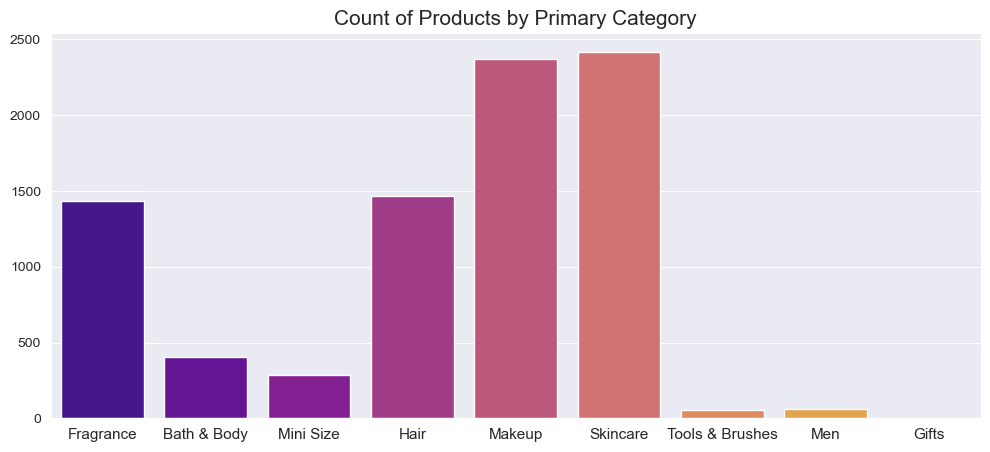

In [32]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x="primary_category", width = 0.8, palette = "plasma")
plt.title("Count of Products by Primary Category", fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize = 11)
plt.show()

<h3> Secondary Category </h3>

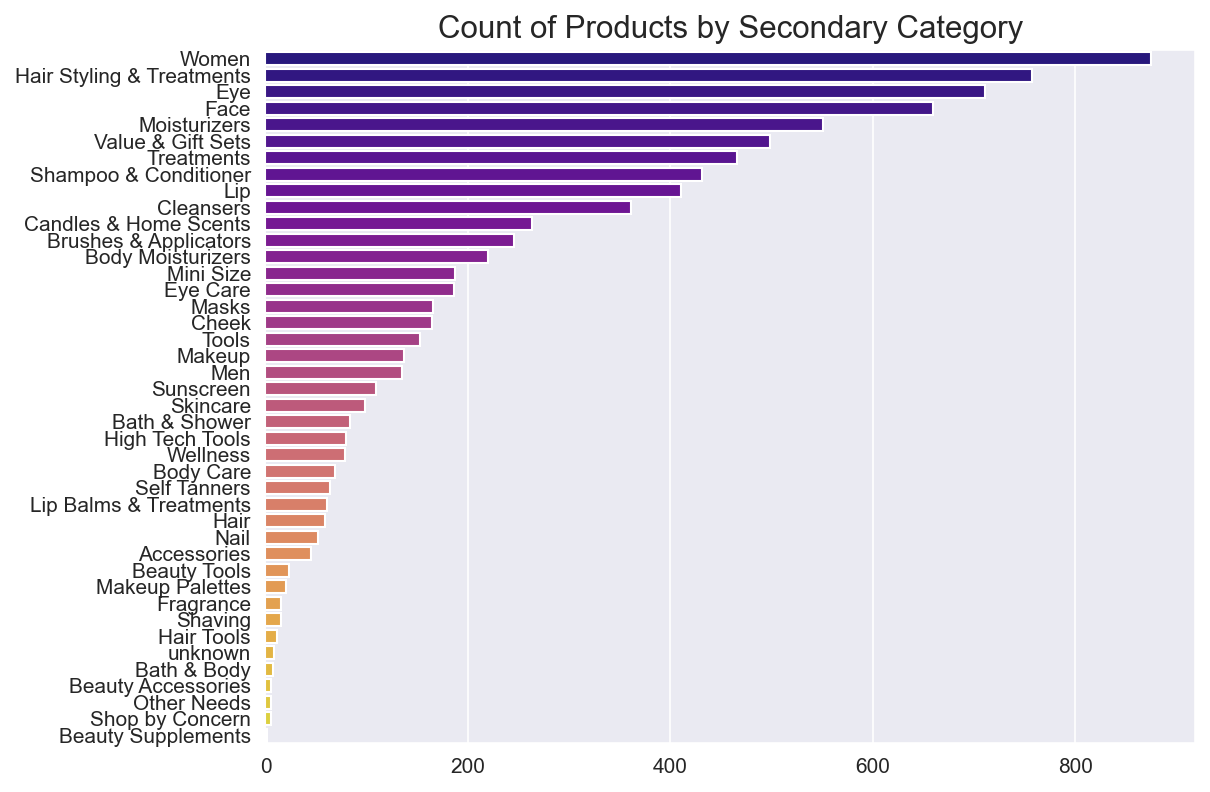

In [33]:
category_counts = df["secondary_category"].value_counts()

plt.figure(figsize=(8, 6), dpi = 150)
sns.barplot(x=category_counts.values, y = category_counts.index, palette = "plasma")
plt.title("Count of Products by Secondary Category", fontsize = 15)
plt.show()

<h3> Brand Name </h3>

In [34]:
df["brand_name"].nunique()

304

In [35]:
# df["brand_name"].unique()

In [36]:
df["brand_name"].value_counts()

SEPHORA COLLECTION     352
CLINIQUE               179
DIOR                   136
TARTE                  131
NEST NEW YORK          115
                      ... 
AQUIS                    1
NARCISO RODRIGUEZ        1
JILLIAN DEMPSEY          1
DOMINIQUE COSMETICS      1
ILUMINAGE                1
Name: brand_name, Length: 304, dtype: int64

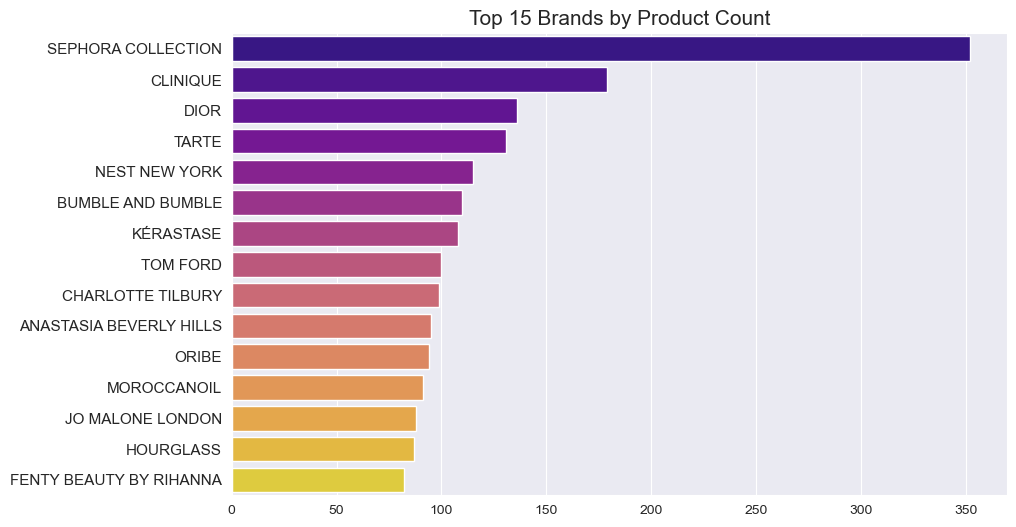

In [37]:
top_brands = df["brand_name"].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette = "plasma")
plt.title("Top 15 Brands by Product Count", fontsize=15)
plt.yticks(fontsize = 11)
plt.show()

<h2> Bivariate Analysis </h2>

<p>  Calculating the pairwise correlation between columns of a data frame: </p>

In [38]:
df.corr(numeric_only = True)

,brand_id,likes_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive
brand_id,1.000000,-0.035604,-0.033878,-0.069571,-0.066667,0.004533,0.027141,0.107290,-0.081976,0.124417
likes_count,-0.035604,1.000000,0.088813,0.685609,-0.089607,-0.069116,-0.076058,-0.163905,-0.053776,0.040512
rating,-0.033878,0.088813,1.000000,0.099885,-0.004534,-0.175204,-0.166838,-0.115258,-0.064395,0.028393
reviews,-0.069571,0.685609,0.099885,1.000000,-0.057158,-0.088411,-0.068654,-0.145589,-0.065314,-0.023933
price_usd,-0.066667,-0.089607,-0.004534,-0.057158,1.000000,0.046343,0.028793,0.091808,-0.022198,-0.140527
limited_edition,0.004533,-0.069116,-0.175204,-0.088411,0.046343,1.000000,0.155662,0.061462,0.162170,0.066938
new,0.027141,-0.076058,-0.166838,-0.068654,0.028793,0.155662,1.000000,0.042553,0.014177,0.066984
online_only,0.107290,-0.163905,-0.115258,-0.145589,0.091808,0.061462,0.042553,1.000000,0.002011,-0.100806
out_of_stock,-0.081976,-0.053776,-0.064395,-0.065314,-0.022198,0.162170,0.014177,0.002011,1.000000,0.025218
sephora_exclusive,0.124417,0.040512,0.028393,-0.023933,-0.140527,0.066938,0.066984,-0.100806,0.025218,1.000000


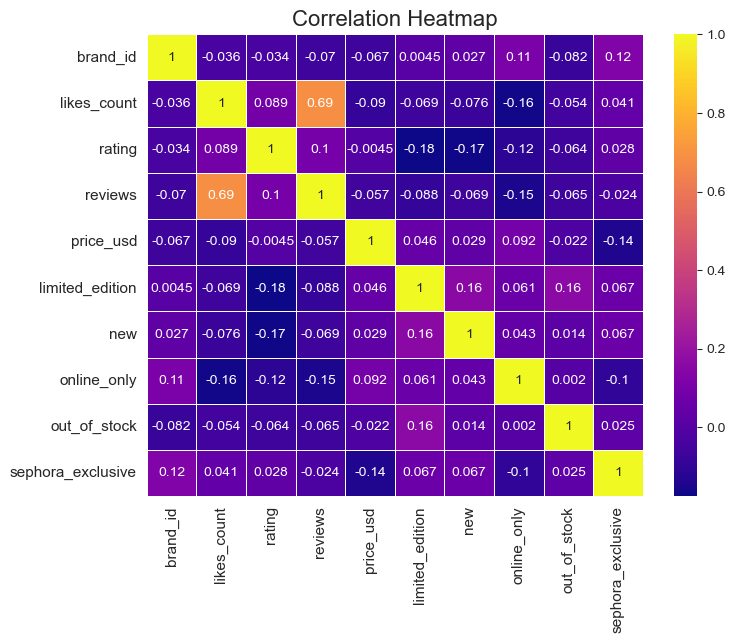

In [39]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="plasma", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

<p> Strong positive correlation between Likes Count and Reviews.</p>

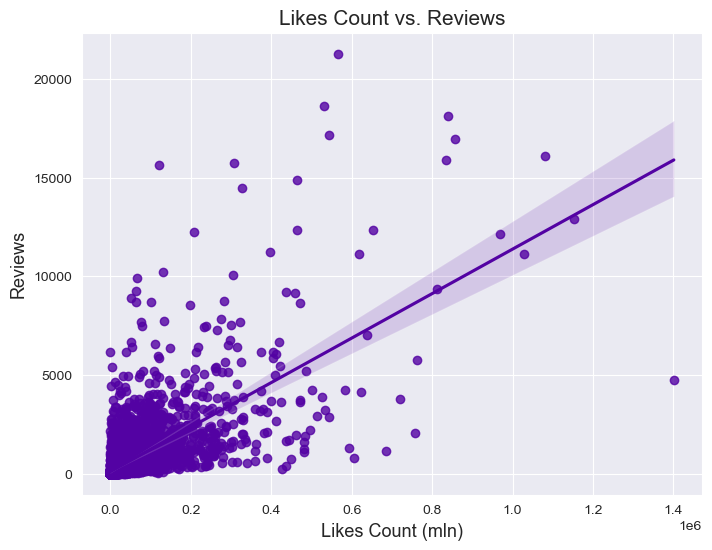

In [40]:
sns.set_palette("plasma")
plt.figure(figsize=(8, 6))
sns.regplot(x="likes_count", y="reviews", data=df)
plt.title("Likes Count vs. Reviews", fontsize=15)
plt.xlabel("Likes Count (mln)", fontsize=13)
plt.ylabel("Reviews", fontsize=13)
plt.show()

<h2> Price Analysis </h2>

<h3> Price by Category </h3>

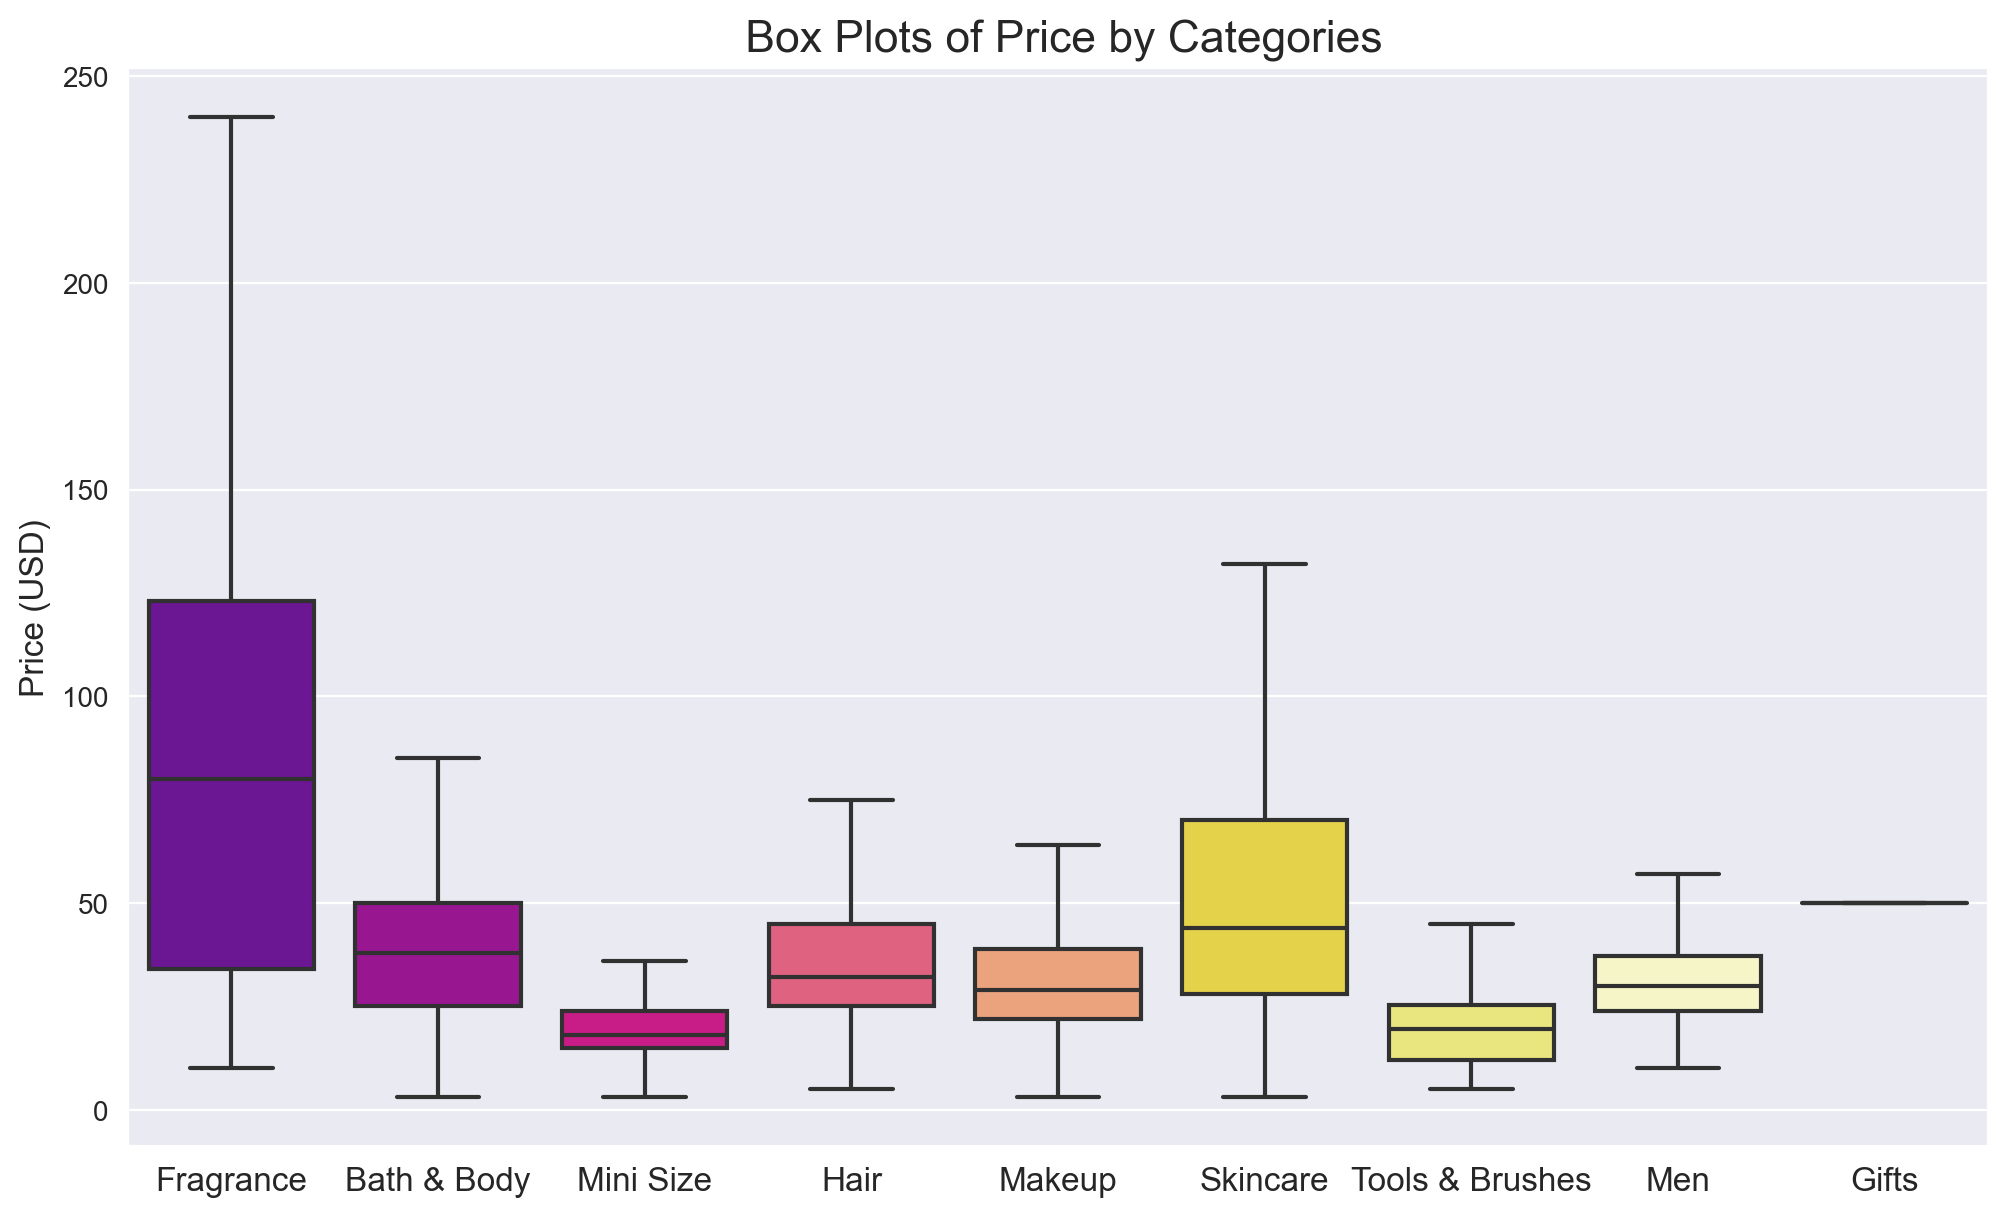

In [41]:
custom_palette = ["#7201A8", "#AD01A5", "#E5008D",  "#F44E77", "#FD9D6C", "#FEE631", "#FBF76E",  "#FEFCBF", "#46039F"]  

plt.figure(figsize = (12, 7), dpi = 200)
sns.boxplot(x="primary_category", y="price_usd", data=df, showfliers = False,  palette = custom_palette)
plt.title(" Box Plots of Price by Categories", fontsize = 16)
plt.xlabel("")
plt.ylabel("Price (USD)", fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

<p>The "Gifts" category is less visible due to its smaller sample size compared to other categories, 4 products only for 50 USD . </p>

In [42]:
df["primary_category"].value_counts()

Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

<p>Only 4 products are in the "Gifts" Category: </P>

In [43]:
df[df["primary_category"]=="Gifts"]

,product_id,product_name,brand_id,brand_name,likes_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
6781,P427616,Heart Gift Card,3902,SEPHORA COLLECTION,0,4.8571,7.0,unknown,50.0,0,0,0,0,0,unknown,Gifts,unknown
6782,P422052,Lips Gift Card,3902,SEPHORA COLLECTION,0,5.0000,1.0,unknown,50.0,0,0,0,0,0,unknown,Gifts,unknown
6784,P370325,Gift Card,3902,SEPHORA COLLECTION,0,4.2791,43.0,unknown,50.0,0,0,0,0,0,unknown,Gifts,unknown
6785,P411049,Happy Birthday Gift Card,3902,SEPHORA COLLECTION,0,4.1176,17.0,unknown,50.0,0,0,0,0,0,unknown,Gifts,unknown


<p>Price Statistics by Category:</p>

In [44]:
categories = df.groupby("primary_category")

In [45]:
categories_prices = categories["price_usd"].agg(["max", "mean", "median", "min"])
categories_prices["mean"] = round(categories_prices["mean"], 2)
categories_prices

,max,mean,median,min
primary_category,,,,
Bath & Body,300.0,42.23,38.0,3.00
Fragrance,395.0,87.26,80.0,10.00
Gifts,50.0,50.00,50.0,50.00
Hair,399.0,42.79,32.0,5.00
Makeup,320.0,32.76,29.0,3.00
Men,104.0,33.20,30.0,10.00
Mini Size,165.0,21.40,18.0,3.00
Skincare,1900.0,60.51,44.0,3.00
Tools & Brushes,249.0,31.92,19.5,4.95


<h3> Price by Brand</h3>

<p>Top 15 Brands by Average Price: </p>

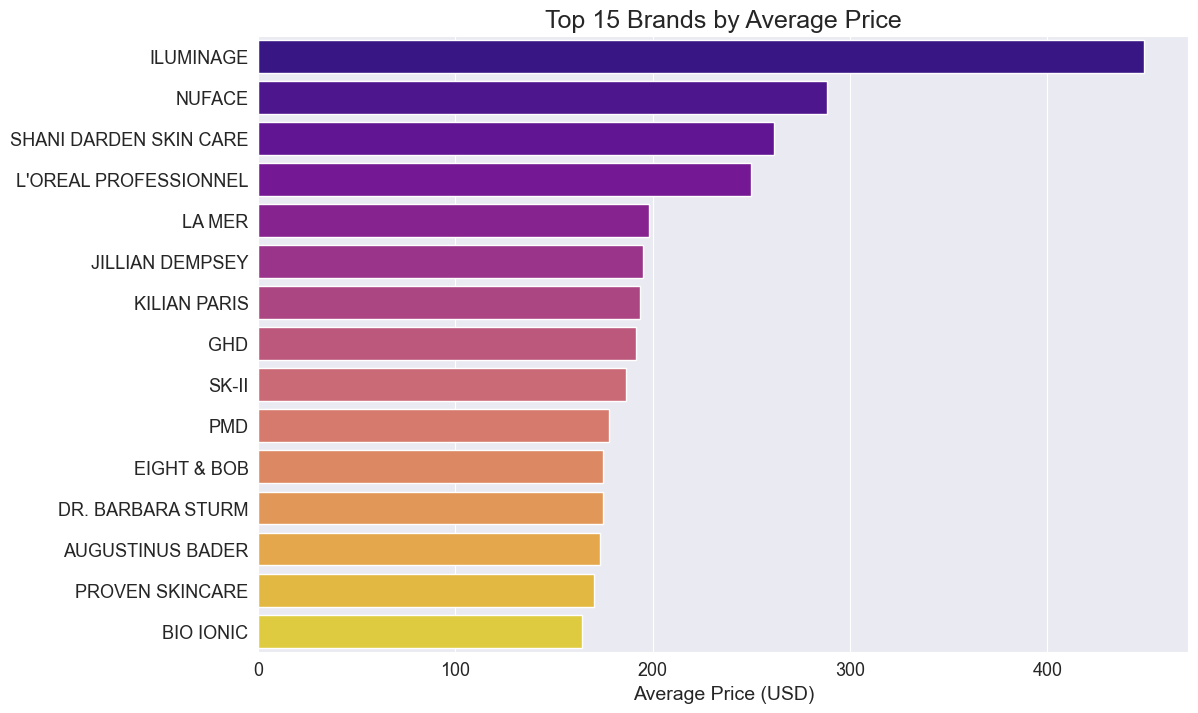

In [46]:
average_prices = df.groupby("brand_name")["price_usd"].mean().reset_index()
average_prices["price_usd"] = average_prices["price_usd"].round(2)
top_15_brands = average_prices.nlargest(15, "price_usd")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_brands, y="brand_name", x="price_usd", palette = "plasma")
plt.xlabel("Average Price (USD)", fontsize=14)
plt.ylabel("")
plt.title("Top 15 Brands by Average Price", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

<h3> Boolean Variables Price Analysis </h3> 

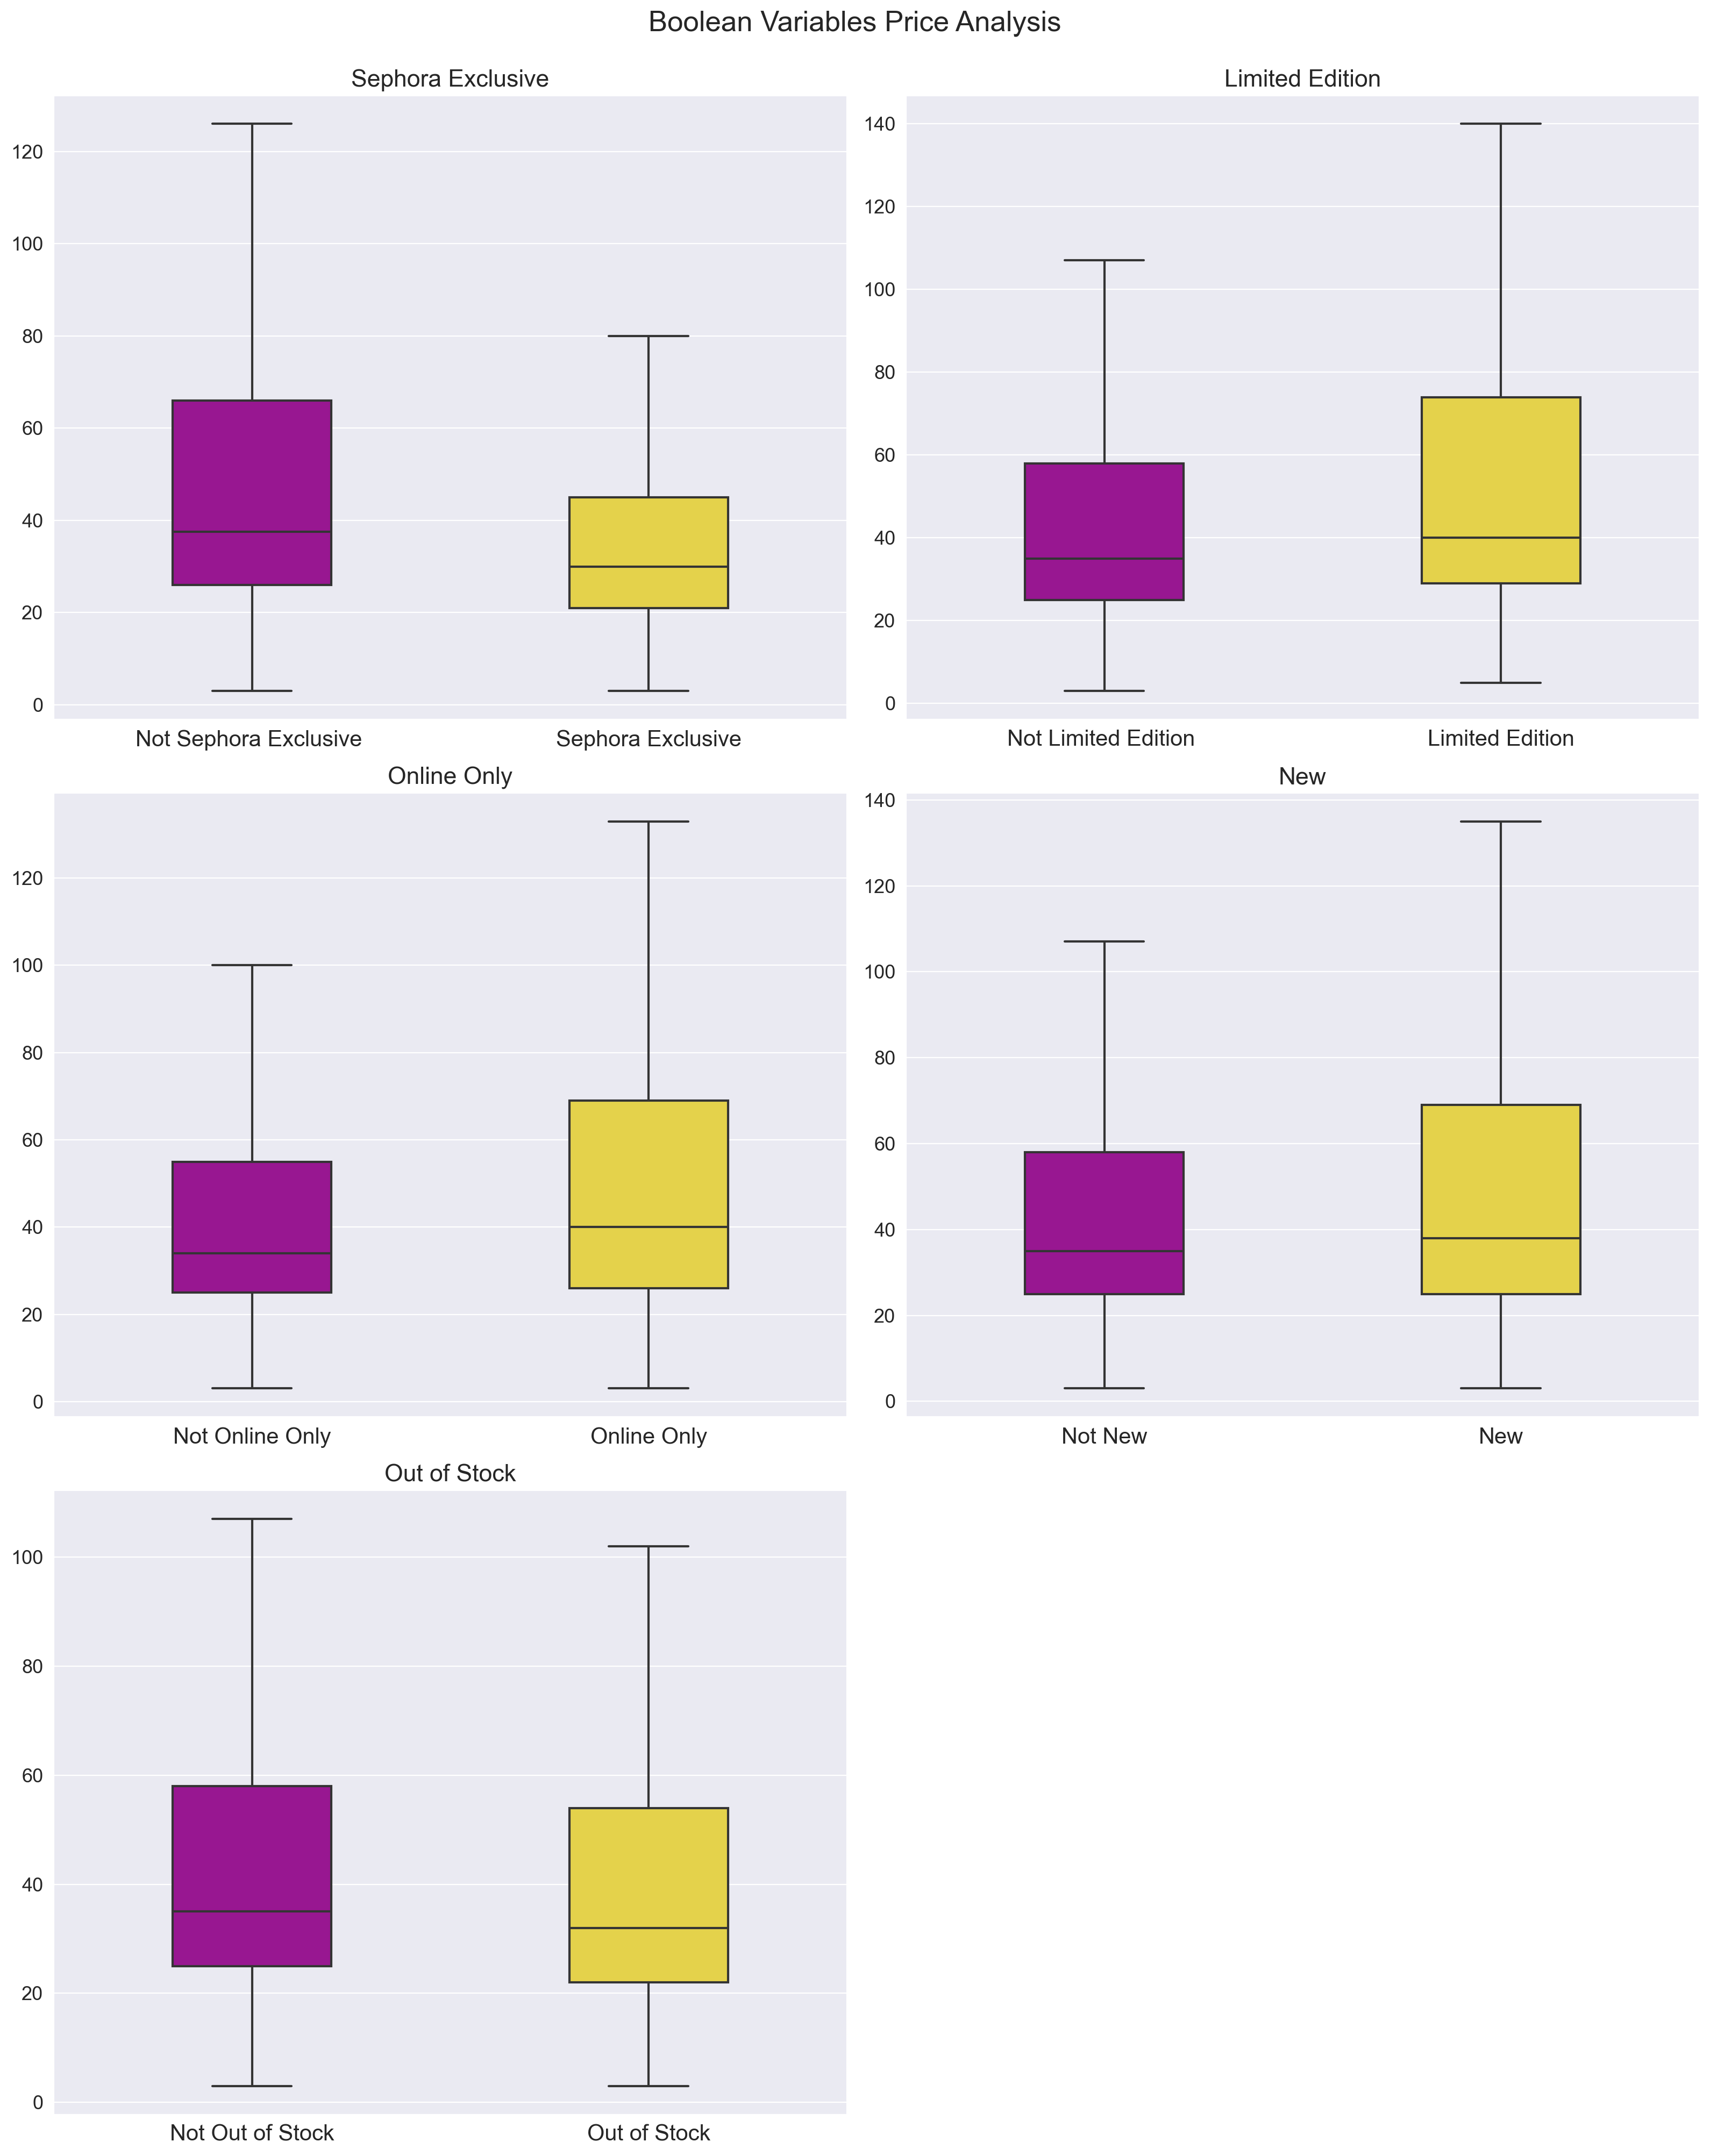

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(16, 20), dpi = 200)

custom_palette = ["#AD01A5", "#FEE631"]
sns.boxplot(x="sephora_exclusive", y="price_usd", data=df, width=0.4, ax=axes[0][0], showfliers = False, palette=custom_palette)
axes[0][0].set_title("Sephora Exclusive", fontsize = 16)
axes[0][0].set_xlabel("")
axes[0][0].set_ylabel("")
axes[0][0].set_xticklabels(["Not Sephora Exclusive ", "Sephora Exclusive"], fontsize=15)
axes[0][0].tick_params(axis='y', labelsize=13)

sns.boxplot(x="limited_edition", y="price_usd", data=df, width=0.4, ax=axes[0][1], showfliers = False, palette=custom_palette)
axes[0][1].set_title("Limited Edition", fontsize = 16)
axes[0][1].set_xlabel("")
axes[0][1].set_ylabel("")
axes[0][1].set_xticklabels(["Not Limited Edition ", "Limited Edition"], fontsize=15)
axes[0][1].tick_params(axis='y', labelsize=13)

sns.boxplot(x="online_only", y="price_usd", data=df, width = 0.4, ax=axes[1][0], showfliers = False, palette=custom_palette)
axes[1][0].set_title("Online Only", fontsize = 16)
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
axes[1][0].set_xticklabels(["Not Online Only", "Online Only"], fontsize=15)
axes[1][0].tick_params(axis='y', labelsize=13)

sns.boxplot(x="new", y="price_usd", data=df, width = 0.4, ax=axes[1][1], showfliers = False, palette=custom_palette)
axes[1][1].set_title("New", fontsize = 16)
axes[1][1].set_xlabel("")
axes[1][1].set_ylabel("")
axes[1][1].set_xticklabels(["Not New", "New"], fontsize=15)
axes[1][1].tick_params(axis='y', labelsize=13)

sns.boxplot(x="out_of_stock", y="price_usd", data=df, width = 0.4, ax=axes[2][0], showfliers = False, palette=custom_palette)
axes[2][0].set_title("Out of Stock", fontsize = 16)
axes[2][0].set_xlabel("")
axes[2][0].set_ylabel("")
axes[2][0].set_xticklabels(["Not Out of Stock", "Out of Stock"], fontsize=15)
axes[2][0].tick_params(axis='y', labelsize=13)

axes[2][1].axis("off")
plt.suptitle("Boolean Variables Price Analysis", fontsize = 19, y=1)

plt.tight_layout()
plt.show()

<h3> Likes Count Analysis </h3>

<h4> Likes Count by Category: </h4>

<p>Average number of Likes Count is used in the analysis to mitigate sensitivity to outliers. </p>

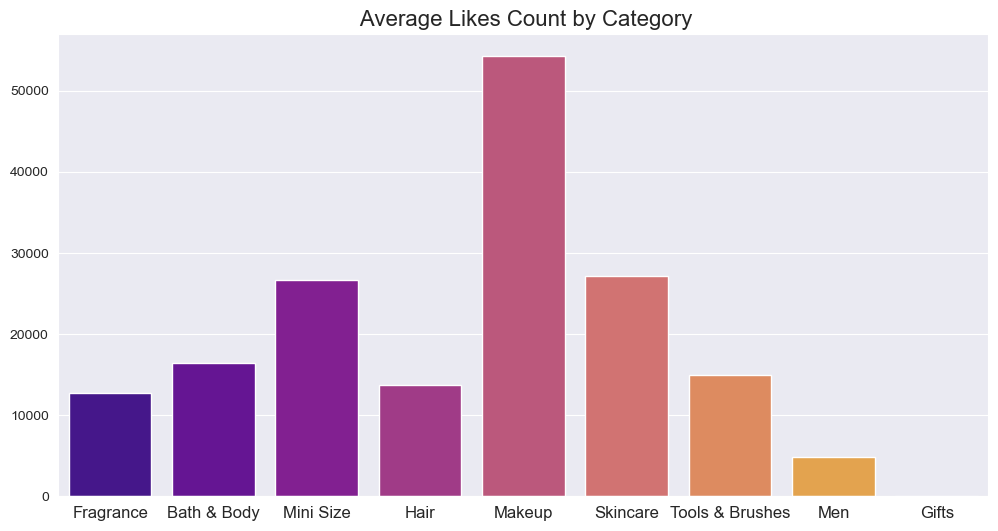

In [48]:
plt.figure(figsize = (12, 6))
sns.barplot(x="primary_category", y="likes_count", data=df, errorbar=None, width = 0.8, palette = "plasma")
plt.title(" Average Likes Count by Category", fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize = 12)
plt.show()

<h4>Likes Count by Brand: </h4>

<p>Average number of Likes Count is used to standardize the influence of brand size on likes.</p>

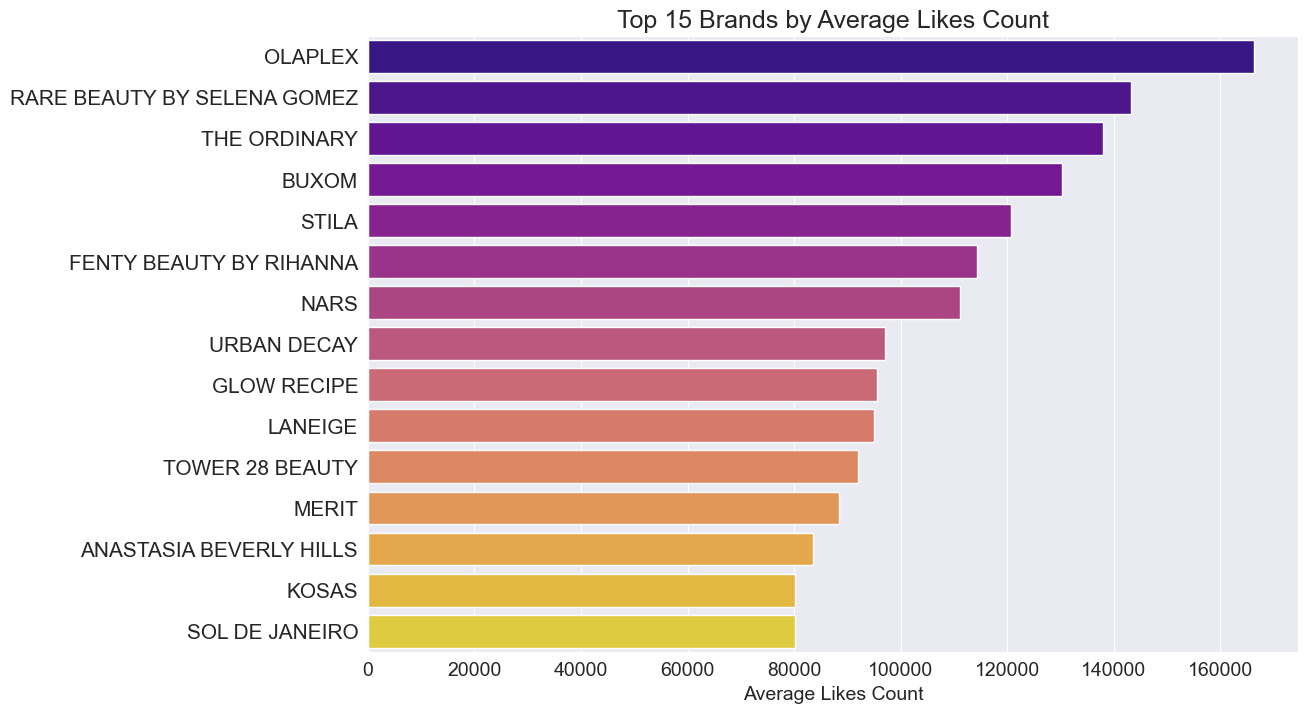

In [49]:
average_likes_count_by_brand = df.groupby("brand_name")["likes_count"].mean().reset_index()
top_15_avg_liked_brands = average_likes_count_by_brand.sort_values(by="likes_count", ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_avg_liked_brands, x="likes_count", y="brand_name", palette = "plasma")
plt.xlabel("Average Likes Count", fontsize=14)
plt.ylabel("")
plt.title("Top 15 Brands by Average Likes Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

<h4>Likes Count by Product:</h4>

<p>Products with the highest Likes Count in each Category: </p>

In [50]:
top_likes_count_per_category = df.groupby("primary_category")["likes_count"].idxmax()
result = df.loc[top_likes_count_per_category, ["primary_category", "product_name","brand_name", "likes_count"]]
result.reset_index(drop=True, inplace=True)
result

,primary_category,product_name,brand_name,likes_count
0,Bath & Body,Brazilian Bum Bum Body Cream,SOL DE JANEIRO,470934
1,Fragrance,Black Opium Eau de Parfum,YVES SAINT LAURENT,276396
2,Gifts,Heart Gift Card,SEPHORA COLLECTION,0
3,Hair,No. 3 Hair Repair Perfector,OLAPLEX,527201
4,Makeup,Soft Pinch Liquid Blush,RARE BEAUTY BY SELENA GOMEZ,1401068
5,Men,Double-Duty Face Moisturizer Broad Spectrum SP...,JACK BLACK,19364
6,Mini Size,Mini Radiant Creamy Concealer,NARS,444366
7,Skincare,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315
8,Tools & Brushes,Eyelash Curler,SHISEIDO,153548


<h3> Reviews Analysis </h3>

<h4>Reviews by Category:</h4>

<p>Average number of Reviews vs. Total number is used in the analysis to mitigate sensitivity to outliers.</p>

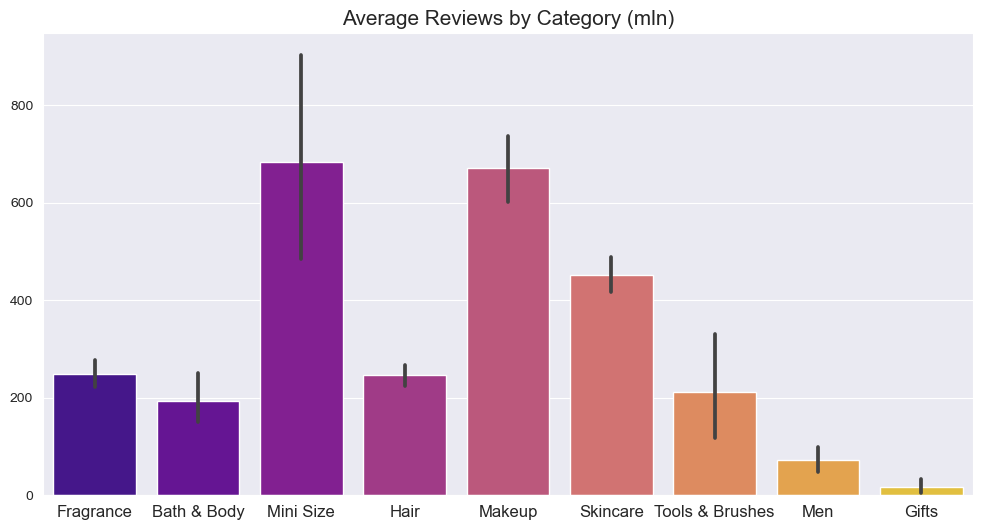

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x="primary_category", y="reviews", data=df, width=0.8, palette = "plasma")
plt.title("Average Reviews by Category (mln)", fontsize=15)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=12)
plt.show()

<h4> Reviews by Brands: </h4>

<p>Average number of Reviews is used to standardize the influence of brand size on Reviews.</p>

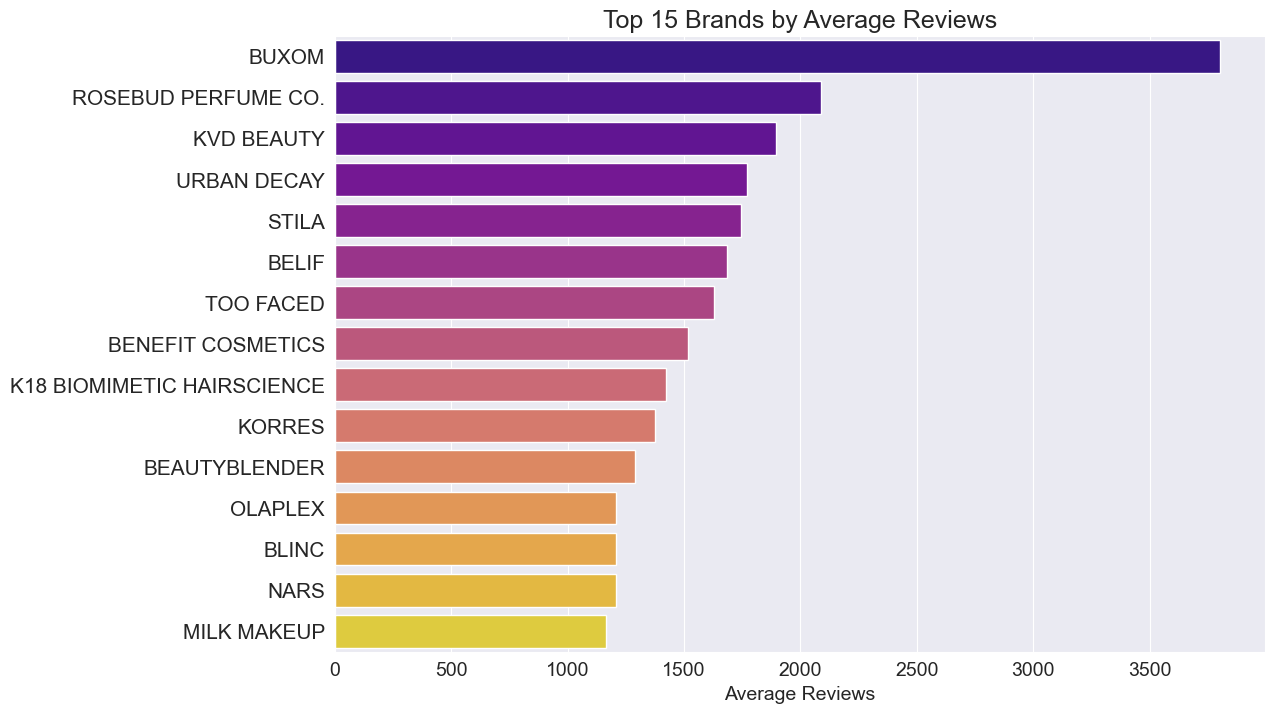

In [52]:
average_reviews_by_brand = df.groupby("brand_name")["reviews"].mean().reset_index()
top_15_avg_reviewed_brands = average_reviews_by_brand.sort_values(by="reviews", ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_avg_reviewed_brands, x="reviews", y="brand_name", palette = "plasma")
plt.xlabel("Average Reviews", fontsize=14)
plt.ylabel("")
plt.title("Top 15 Brands by Average Reviews", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

<h4> Reviews by Products: </h4> 

In [53]:
top_reviews_per_category = df.groupby("primary_category")["reviews"].idxmax()
result = df.loc[top_reviews_per_category, ["primary_category", "product_name", "brand_name", "reviews"]]
result.reset_index(drop=True, inplace=True)
result

,primary_category,product_name,brand_name,reviews
0,Bath & Body,Brazilian Bum Bum Body Cream,SOL DE JANEIRO,8671.0
1,Fragrance,Black Opium Eau de Parfum,YVES SAINT LAURENT,7838.0
2,Gifts,Gift Card,SEPHORA COLLECTION,43.0
3,Hair,Perfect hair Day (PhD) Dry Shampoo,LIVING PROOF,4024.0
4,Makeup,Tattoo Liner Vegan Waterproof Liquid Eyeliner,KVD BEAUTY,21281.0
5,Men,Beard Lube Conditioning Shave,JACK BLACK,480.0
6,Mini Size,Mini Better Than Sex Volumizing & Lengthening ...,TOO FACED,15620.0
7,Skincare,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,16118.0
8,Tools & Brushes,Eyelash Curler,SHISEIDO,2234.0


<h2> Most Common Ingredients </h2>

In [54]:
all_ingredients = ' '.join(df['ingredients'])
ingredients_list = all_ingredients.split(",")

top_20_ingredients = pd.Series(ingredients_list).value_counts().head(20)
top_20_ingredients_df = pd.DataFrame({'Top Ingredients': top_20_ingredients.index})

print(top_20_ingredients_df.to_string(index=False))

              Top Ingredients
                     Glycerin
               Phenoxyethanol
              Caprylyl Glycol
                   Tocopherol
                     Limonene
           Ethylhexylglycerin
                     Linalool
                       Silica
              Butylene Glycol
                  Dimethicone
                  Citric Acid
            Potassium Sorbate
 Caprylic/Capric Triglyceride
              Sodium Benzoate
                  Citronellol
           Tocopheryl Acetate
                  Propanediol
                     Geraniol
           Sodium Hyaluronate
                         Mica


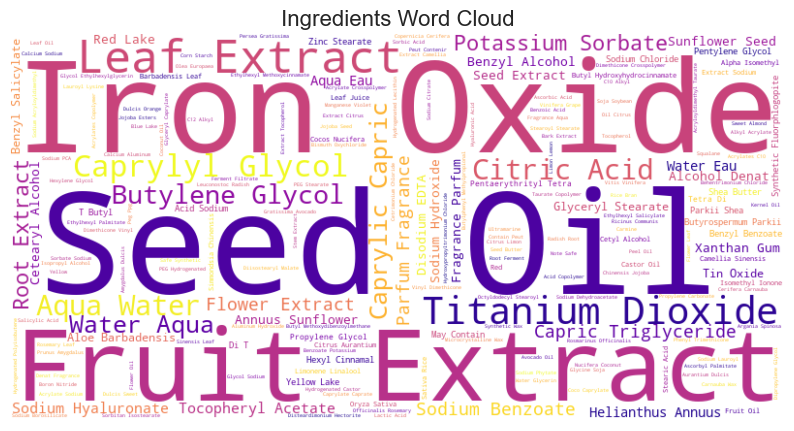

In [55]:
stopwords = set(STOPWORDS)
stopwords.add('Ci')

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="plasma", stopwords = stopwords).generate(all_ingredients)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.title("Ingredients Word Cloud", fontsize=16)
plt.show()

<h3> Conclusion </h3>

<p>In this project, an analysis and visualization of customer preferences, prices, ratings and product characteristics were performed.
The dataset revealed several numeric variables with significant outliers, particularly high prices, likes counts and review counts. These anomalies require additional investigation.</p>
<p>Correlation analysis was carried out, uncovering a strong positive correlation between "likes count" and "reviews". Further analysis is needed to  investigate this relationship and explore potential underlying factors.
No notable correlation was detected between "price_usd" and other features.</p>
<p>These findings provide a valuable foundation for further exploration and decision-making in the cosmetics and beauty retail industry.</p>

<h4> Author: Svetlana Sedykh, 2023-10-05 </h4>